# Importing Libraries and Dataset

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/LoanApprovalPrediction.csv")

In [296]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [297]:
data.shape

(598, 13)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


# Data Preprocessing and Visualization

In [299]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [300]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [301]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

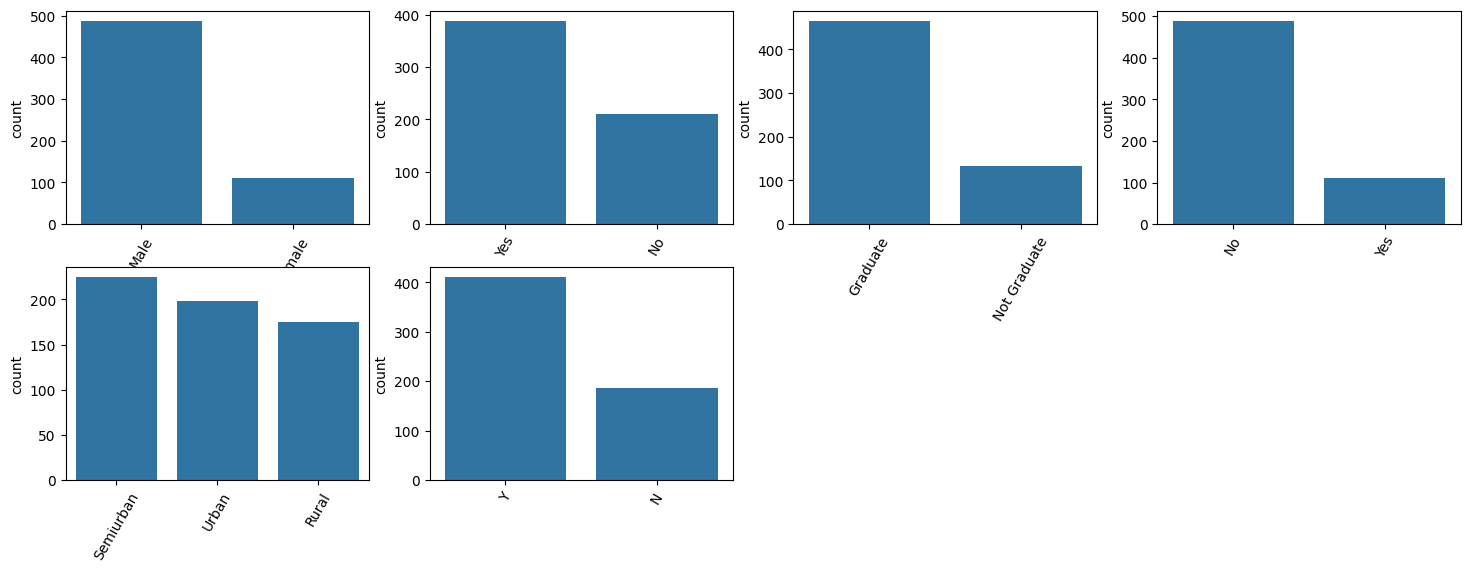

In [302]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=60)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [303]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int64  
 1   Married            598 non-null    int64  
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    int64  
 4   Self_Employed      598 non-null    int64  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    int64  
 11  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 56.2 KB


<Axes: >

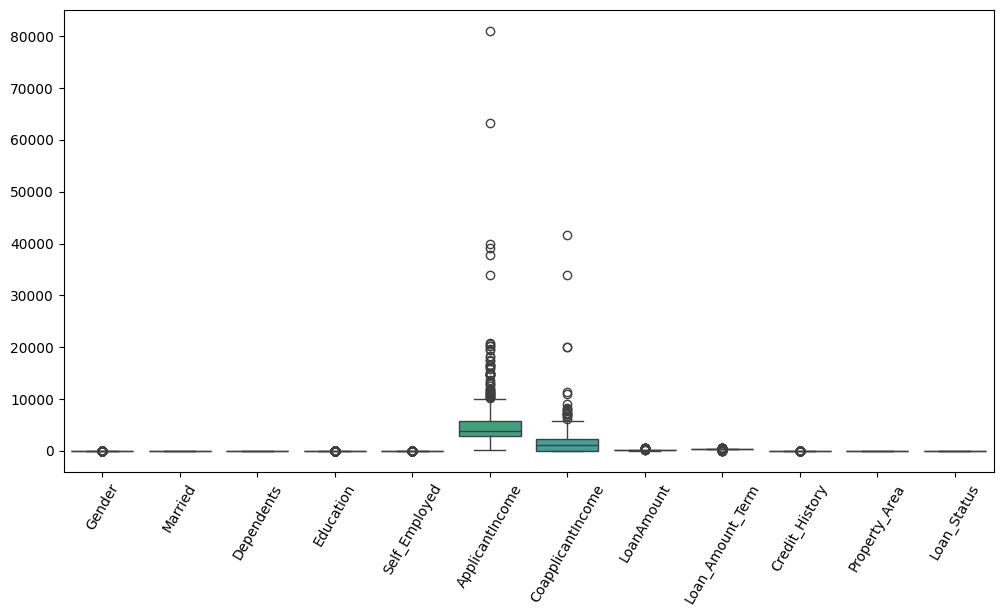

In [305]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
sns.boxplot(data=data)

<Axes: >

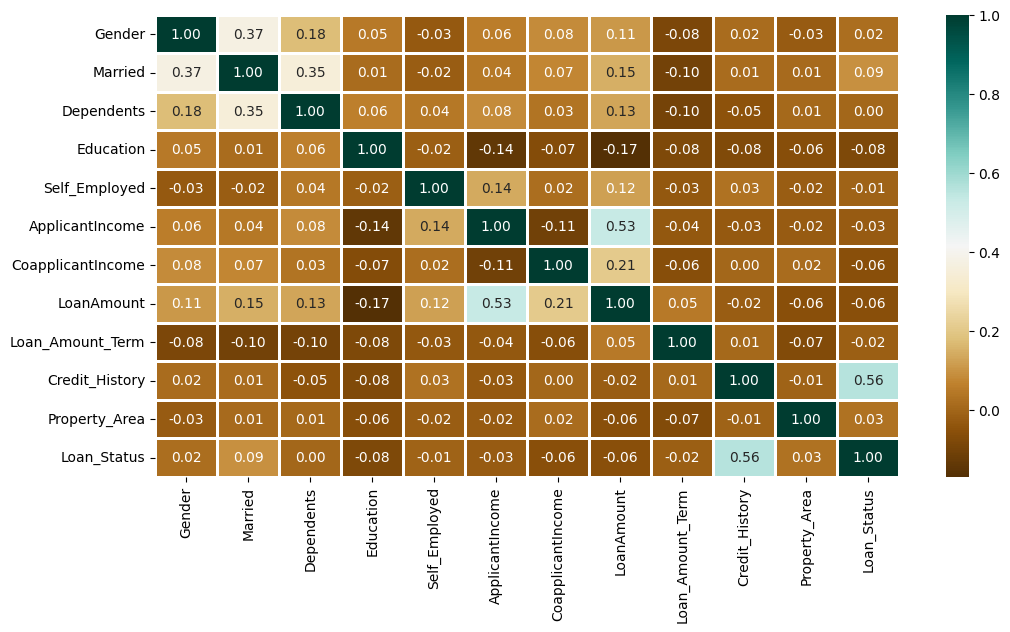

In [306]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

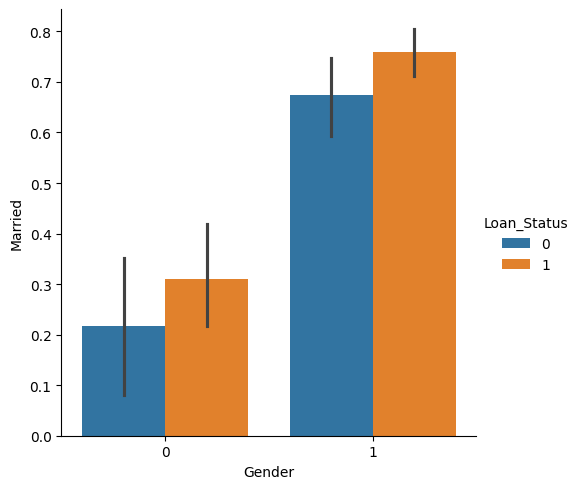

In [307]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

In [308]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())


In [309]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting Dataset

In [310]:
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']

In [311]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0         0.0          0              0             5849   
1         1        1         1.0          0              0             4583   
2         1        1         0.0          0              1             3000   
3         1        1         0.0          1              0             2583   
4         1        0         0.0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
593       0        0         0.0          0              0             2900   
594       1        1         3.0          0              0             4106   
595       1        1         1.0          0              0             8072   
596       1        1         2.0          0              0             7583   
597       0        0         0.0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [312]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
print(X)

[[1.         0.         0.         ... 0.74358974 1.         1.        ]
 [1.         1.         0.33333333 ... 0.74358974 1.         0.        ]
 [1.         1.         0.         ... 0.74358974 1.         1.        ]
 ...
 [1.         1.         0.33333333 ... 0.74358974 1.         1.        ]
 [1.         1.         0.66666667 ... 0.74358974 1.         1.        ]
 [0.         0.         0.         ... 0.74358974 0.         0.5       ]]


In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((478, 11), (120, 11), (478,), (120,))

In [314]:
print(X_train)

[[1.         1.         0.66666667 ... 0.74358974 1.         0.        ]
 [0.         0.         0.         ... 0.74358974 0.         0.5       ]
 [1.         1.         0.33333333 ... 0.15384615 1.         0.        ]
 ...
 [1.         0.         0.         ... 0.70495258 0.         0.        ]
 [0.         0.         0.         ... 0.70495258 1.         1.        ]
 [1.         1.         0.66666667 ... 0.74358974 1.         1.        ]]


In [315]:

print(X_test)

[[1.         0.         0.         ... 1.         0.84335155 1.        ]
 [0.         0.         0.         ... 0.74358974 1.         0.5       ]
 [1.         1.         0.         ... 0.         0.84335155 1.        ]
 ...
 [0.         0.         0.33333333 ... 0.74358974 1.         0.5       ]
 [1.         1.         0.         ... 0.74358974 1.         1.        ]
 [1.         0.         0.66666667 ... 0.74358974 0.         0.        ]]


# Model Training and Evaluation

In [316]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [317]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)

lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.69874476987448
Accuracy score of  KNeighborsClassifier = 84.93723849372385
Accuracy score of  LogisticRegression = 80.5439330543933


In [318]:
# making predictions on the testing set
for clf in (rfc, knn,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 80.0
Accuracy score of  KNeighborsClassifier = 80.0
Accuracy score of  LogisticRegression = 82.5
